## Figures for the paper

In [5]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as stats
import netCDF4

In [2]:
# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

### Figure 1

Historical (1991-2000) April Tmax and Annual PR for (1) WRF, (2) Livneh, (3) LOCA-WRF, and (4) LOCA-Livneh.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greate

0.249558296391
0.289530830359


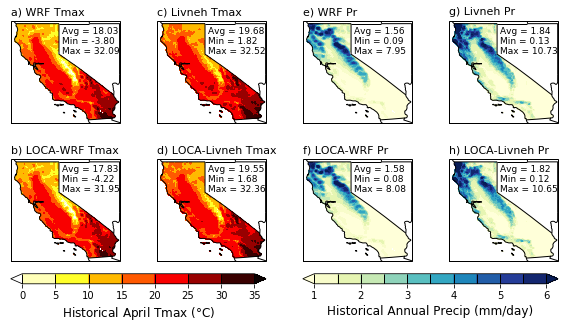

In [18]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

datasets = ['wrf', 'livneh', 'loca_wrf', 'loca_livneh']

# First 2 rows/cols: April Tmax
ticks_tmax = np.linspace(0,35,8)

wrf_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
wrf_tmax = wrf_nc.variables['tmax'][:,:]
lat = wrf_nc.variables['lat'][:]
lon = wrf_nc.variables['lon'][:]
wrf_nc.close()

livneh_nc = netCDF4.Dataset(data_dir+'livneh_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
livneh_tmax = livneh_nc.variables['tmax'][:,:]
livneh_nc.close()

loca_wrf_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_tmax = loca_wrf_nc.variables['tmax'][:,:]
loca_wrf_nc.close()

loca_livneh_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_tmax = loca_livneh_nc.variables['tmax'][:,:]
loca_livneh_nc.close()

# Last 2 rows/cols: Annual Pr
ticks_pr = np.linspace(1,6,11)

wrf_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_pr = wrf_nc.variables['pr'][:,:]
wrf_nc.close()

livneh_nc = netCDF4.Dataset(data_dir+'livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
livneh_pr = livneh_nc.variables['pr'][:,:]
livneh_nc.close()

loca_wrf_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_pr = loca_wrf_nc.variables['pr'][:,:]
loca_wrf_nc.close()

loca_livneh_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_pr = loca_livneh_nc.variables['pr'][:,:]
loca_livneh_nc.close()

# AVG, MIN, and MAX statistics
wrf_tmax_real = wrf_tmax[wrf_tmax > -100] # quick way to filter out nans
wrf_pr_real = wrf_pr[wrf_pr > -100] 
wrf_tmax_avg, wrf_tmax_min, wrf_tmax_max = np.mean(wrf_tmax_real),np.min(wrf_tmax_real), np.max(wrf_tmax_real)
wrf_pr_avg, wrf_pr_min, wrf_pr_max = np.mean(wrf_pr_real), np.min(wrf_pr_real), np.max(wrf_pr_real)

livneh_tmax_real = livneh_tmax[livneh_tmax > -100] 
livneh_pr_real = livneh_pr[livneh_pr > -100] 
livneh_tmax_avg, livneh_tmax_min, livneh_tmax_max = np.mean(livneh_tmax_real), np.min(livneh_tmax_real), \
                np.max(livneh_tmax_real)
livneh_pr_avg, livneh_pr_min, livneh_pr_max = np.mean(livneh_pr_real), np.min(livneh_pr_real), np.max(livneh_pr_real)
    
loca_wrf_tmax_real = loca_wrf_tmax[loca_wrf_tmax > -100] # quick way to filter out nans
loca_wrf_pr_real = loca_wrf_pr[loca_wrf_pr > -100] 
loca_wrf_tmax_avg, loca_wrf_tmax_min, loca_wrf_tmax_max = np.mean(loca_wrf_tmax_real), \
                    np.min(loca_wrf_tmax_real), np.max(loca_wrf_tmax_real)
loca_wrf_pr_avg, loca_wrf_pr_min, loca_wrf_pr_max = np.mean(loca_wrf_pr_real), \
                                                np.min(loca_wrf_pr_real), np.max(loca_wrf_pr_real)

loca_livneh_tmax_real = loca_livneh_tmax[loca_livneh_tmax > -100] # quick way to filter out nans
loca_livneh_pr_real = loca_livneh_pr[loca_livneh_pr > -100] 
loca_livneh_tmax_avg, loca_livneh_tmax_min, loca_livneh_tmax_max = np.mean(loca_livneh_tmax_real), \
                    np.min(loca_livneh_tmax_real), np.max(loca_livneh_tmax_real)
loca_livneh_pr_avg, loca_livneh_pr_min, loca_livneh_pr_max = np.mean(loca_livneh_pr_real), \
                                                np.min(loca_livneh_pr_real), np.max(loca_livneh_pr_real)


# Mean absolute error statistics --
# Compute dataset to dataset differences
diff_wrf_loca_wrf_tmax = wrf_tmax_real - loca_wrf_tmax_real
diff_wrf_loca_wrf_pr= wrf_pr_real - loca_wrf_pr_real
diff_livneh_loca_livneh_tmax = livneh_tmax_real - loca_livneh_tmax_real
diff_livneh_loca_livneh_pr = livneh_pr_real - loca_livneh_pr_real

# Statistics (mean absolute error)
mae_diff_wrf_loca_wrf_tmax = np.mean(np.abs(diff_wrf_loca_wrf_tmax))
mae_diff_wrf_loca_wrf_pr = np.mean(np.abs(diff_wrf_loca_wrf_pr))

mae_diff_livneh_loca_livneh_tmax = np.mean(np.abs(diff_livneh_loca_livneh_tmax))
mae_diff_livneh_loca_livneh_pr = np.mean(np.abs(diff_livneh_loca_livneh_pr))

print(mae_diff_wrf_loca_wrf_tmax)
print(mae_diff_livneh_loca_livneh_tmax)
    
# Plot ---     
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(2, 4, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) WRF Tmax', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
ax1.text(-119.75, 41, 'Avg = {0:.2f}'.format(wrf_tmax_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax1.text(-119.75, 40, 'Min = {0:.2f}'.format(wrf_tmax_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax1.text(-119.75, 39, 'Max = {0:.2f}'.format(wrf_tmax_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot1 = ax1.contourf(lon, lat, wrf_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax2 = fig.add_subplot(2, 4, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('c) Livneh Tmax', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-119.75, 41, 'Avg = {0:.2f}'.format(livneh_tmax_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax2.text(-119.75, 40, 'Min = {0:.2f}'.format(livneh_tmax_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax2.text(-119.75, 39, 'Max = {0:.2f}'.format(livneh_tmax_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot2 = ax2.contourf(lon, lat, livneh_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax3 = fig.add_subplot(2, 4, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('e) WRF Pr', loc='left', fontsize=11)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(cfeature.BORDERS)
ax3.set_extent([235.25,246,32.25,42.25])
ax3.text(-119.75, 41, 'Avg = {0:.2f}'.format(wrf_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax3.text(-119.75, 40, 'Min = {0:.2f}'.format(wrf_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax3.text(-119.75, 39, 'Max = {0:.2f}'.format(wrf_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot3 = ax3.contourf(lon, lat, wrf_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu', extend='both')

ax4 = fig.add_subplot(2, 4, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('g) Livneh Pr', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
ax4.text(-119.75, 41, 'Avg = {0:.2f}'.format(livneh_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax4.text(-119.75, 40, 'Min = {0:.2f}'.format(livneh_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax4.text(-119.75, 39, 'Max = {0:.2f}'.format(livneh_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot4 = ax4.contourf(lon, lat, livneh_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu', extend='both')

ax5 = fig.add_subplot(2, 4, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('b) LOCA-WRF Tmax', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
ax5.text(-119.75, 41, 'Avg = {0:.2f}'.format(loca_wrf_tmax_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax5.text(-119.75, 40, 'Min = {0:.2f}'.format(loca_wrf_tmax_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax5.text(-119.75, 39, 'Max = {0:.2f}'.format(loca_wrf_tmax_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot5 = ax5.contourf(lon, lat, loca_wrf_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax6 = fig.add_subplot(2, 4, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('d) LOCA-Livneh Tmax', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
ax6.text(-119.75, 41, 'Avg = {0:.2f}'.format(loca_livneh_tmax_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax6.text(-119.75, 40, 'Min = {0:.2f}'.format(loca_livneh_tmax_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax6.text(-119.75, 39, 'Max = {0:.2f}'.format(loca_livneh_tmax_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot6 = ax6.contourf(lon, lat, loca_livneh_tmax, ticks_tmax, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax7 = fig.add_subplot(2, 4, 7, projection=ccrs.PlateCarree())
ax7.coastlines('50m')
ax7.set_title('f) LOCA-WRF Pr', loc='left', fontsize=11)
ax7.add_feature(states_provinces, edgecolor='black')
ax7.add_feature(cfeature.BORDERS)
ax7.set_extent([235.25,246,32.25,42.25])
ax7.text(-119.75, 41, 'Avg = {0:.2f}'.format(loca_wrf_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax7.text(-119.75, 40, 'Min = {0:.2f}'.format(loca_wrf_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax7.text(-119.75, 39, 'Max = {0:.2f}'.format(loca_wrf_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot7 = ax7.contourf(lon, lat, loca_wrf_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu', extend='both')

ax8 = fig.add_subplot(2, 4, 8, projection=ccrs.PlateCarree())
ax8.coastlines('50m')
ax8.set_title('h) LOCA-Livneh Pr', loc='left', fontsize=11)
ax8.add_feature(states_provinces, edgecolor='black')
ax8.add_feature(cfeature.BORDERS)
ax8.set_extent([235.25,246,32.25,42.25])
ax8.text(-119.75, 41, 'Avg = {0:.2f}'.format(loca_livneh_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax8.text(-119.75, 40, 'Min = {0:.2f}'.format(loca_livneh_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
ax8.text(-119.75, 39, 'Max = {0:.2f}'.format(loca_livneh_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=9)
plot8 = ax8.contourf(lon, lat, loca_livneh_pr, ticks_pr, transform=ccrs.PlateCarree(), cmap='YlGnBu', extend='both')

fig.tight_layout()

# Colorbar specifications
cbar_height = 0.035

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()
ax7_pos = ax7.get_position()
ax8_pos = ax8.get_position()

# Colorbar for Tmax panels (1, 2, 5, 6) 
cbar_ax_tmax = fig.add_axes([ax5_pos.x0, ax5_pos.y0-.05, ax6_pos.x1-ax5_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar_tmax = plt.colorbar(plot1, cax=cbar_ax_tmax, orientation='horizontal', drawedges=True, extend='both')
cbar_tmax.dividers.set_edgecolor('black')
cbar_tmax.dividers.set_linewidth(1)
cbar_tmax.set_label('Historical April Tmax ($\degree$C)', fontsize=12)

# Colorbar for Pr panels (3, 4, 7, 8) 
cbar_ax_pr = fig.add_axes([ax7_pos.x0, ax7_pos.y0-.05, ax8_pos.x1-ax7_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar_pr = plt.colorbar(plot3, cax=cbar_ax_pr, orientation='horizontal', drawedges=True, extend='both')
cbar_pr.dividers.set_edgecolor('black')
cbar_pr.dividers.set_linewidth(1)
cbar_pr.set_label('Historical Annual Precip (mm/day)', fontsize=12)

#plt.savefig('/Users/nberg/projects/doe/figures/Figure1.jpeg', dpi=300, bbox_inches='tight')

## Figure 2 

5-panel plot of changes in April Tmax (Raw GCM, WRF, NARR(bc), LOCA-WRF, and LOCA-Livneh.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launche

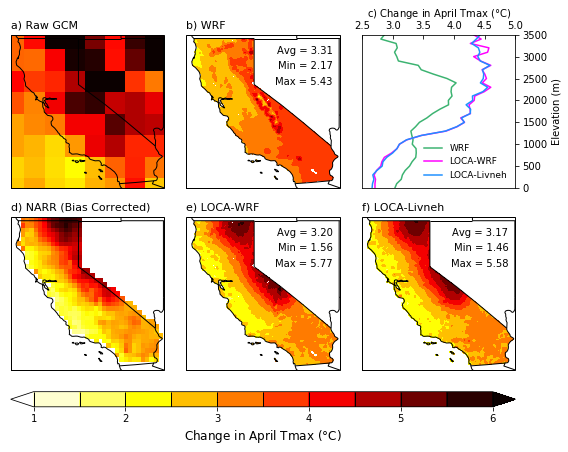

In [20]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5)
gcm_change_nc = xr.open_dataset('/Users/nberg/projects/doe/scratch/cnrm_cm5_diff_tmax_april.nc')
gcm_change_tmax = gcm_change_nc['AIR2M'][:,:]
gcm_lon = gcm_change_nc['LON']
gcm_lat = gcm_change_nc['LAT']

# WRF 
wrf_fut_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
wrf_fut_tmax = wrf_fut_nc.variables['tmax'][:,:]
same_lat = wrf_fut_nc.variables['lat'][:]
same_lon = wrf_fut_nc.variables['lon'][:]
wrf_hist_tmax = wrf_hist_nc.variables['tmax'][:,:]
wrf_change_tmax = wrf_fut_tmax - wrf_hist_tmax
wrf_fut_nc.close()
wrf_hist_nc.close()

# NARR (BC) 
narr_fut_nc = netCDF4.Dataset(data_dir+'narr_forcing_livneh_fut_1991-2000_tmax_april_CA_mask.nc', 'r')
narr_hist_nc = netCDF4.Dataset(data_dir+'livneh_narr_grid_hist_1991-2000_tmax_april_CA_mask.nc', 'r')
narr_fut_tmax = narr_fut_nc.variables['tmax'][:,:]
narr_lat = narr_fut_nc.variables['lat'][:]
narr_lon = narr_fut_nc.variables['lon'][:]
narr_hist_tmax = narr_hist_nc.variables['tmax'][:,:]
narr_change_tmax = narr_fut_tmax - narr_hist_tmax
narr_fut_nc.close()
narr_hist_nc.close()

# WRF-LOCA
loca_wrf_fut_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_hist_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_wrf_fut_tmax = loca_wrf_fut_nc.variables['tmax'][:,:]
loca_wrf_hist_tmax = loca_wrf_hist_nc.variables['tmax'][:,:]
loca_wrf_change_tmax = loca_wrf_fut_tmax - loca_wrf_hist_tmax
loca_wrf_fut_nc.close()
loca_wrf_hist_nc.close()

# LOCA-Livneh
loca_livneh_fut_nc = netCDF4.Dataset(data_dir+'loca_livneh_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_hist_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
loca_livneh_fut_tmax = loca_livneh_fut_nc.variables['tmax'][:,:]
loca_livneh_hist_tmax = loca_livneh_hist_nc.variables['tmax'][:,:]
loca_livneh_change_tmax = loca_livneh_fut_tmax - loca_livneh_hist_tmax
loca_livneh_fut_nc.close()
loca_livneh_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_change_tmax.flatten()
df['LOCA-WRF'] = loca_wrf_change_tmax.flatten()
df['LOCA-Livneh'] = loca_livneh_change_tmax.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg warming in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])

# AVG, MIN, and MAX statistics
wrf_change_tmax_real = wrf_change_tmax[wrf_change_tmax > -100] # quick way to filter out nans
wrf_change_tmax_avg, wrf_change_tmax_min, wrf_change_tmax_max = np.mean(wrf_change_tmax_real),\
                                    np.min(wrf_change_tmax_real), np.max(wrf_change_tmax_real)
    
loca_wrf_change_tmax_real = loca_wrf_change_tmax[loca_wrf_change_tmax > -100] # quick way to filter out nans
loca_wrf_change_tmax_avg, loca_wrf_change_tmax_min, loca_wrf_change_tmax_max = np.mean(loca_wrf_change_tmax_real), \
                    np.min(loca_wrf_change_tmax_real), np.max(loca_wrf_change_tmax_real)

loca_livneh_change_tmax_real = loca_livneh_change_tmax[loca_livneh_change_tmax > -100] # quick way to filter out nans
loca_livneh_change_tmax_avg, loca_livneh_change_tmax_min, loca_livneh_change_tmax_max = np.mean(loca_livneh_change_tmax_real), \
                    np.min(loca_livneh_change_tmax_real), np.max(loca_livneh_change_tmax_real)
    
# Figure ---
plot_ticks = np.linspace(1,6,11)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_change_tmax, transform=ccrs.PlateCarree(), 
                       cmap='hot_r', vmin=1, vmax=6)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))

# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-114.5, 41, 'Avg = {0:.2f}'.format(wrf_change_tmax_avg),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-114.5, 40, 'Min = {0:.2f}'.format(wrf_change_tmax_min),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-114.5, 39, 'Max = {0:.2f}'.format(wrf_change_tmax_max),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot2 = ax2.contourf(same_lon, same_lat, wrf_change_tmax, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))

# Temperature change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc='lower right', frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) Change in April Tmax ($\degree$C)')
ax3.set_ylim(0,3500)
ax3.set_xlim(2.5,5)
xx0,xx1 = ax3.get_xlim()
yy0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))


# NARR (Bias Corrected)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) NARR (Bias Corrected)', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_change_tmax, transform=ccrs.PlateCarree(), 
                       cmap='hot_r', vmin=1, vmax=6)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
ax5.text(-114.5, 41, 'Avg = {0:.2f}'.format(loca_wrf_change_tmax_avg),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-114.5, 40, 'Min = {0:.2f}'.format(loca_wrf_change_tmax_min),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-114.5, 39, 'Max = {0:.2f}'.format(loca_wrf_change_tmax_max),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot5 = ax5.contourf(same_lon, same_lat, loca_wrf_change_tmax, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
ax6.text(-114.5, 41, 'Avg = {0:.2f}'.format(loca_livneh_change_tmax_avg),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-114.5, 40, 'Min = {0:.2f}'.format(loca_livneh_change_tmax_min),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-114.5, 39, 'Max = {0:.2f}'.format(loca_livneh_change_tmax_max),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot6 = ax6.contourf(same_lon, same_lat, loca_livneh_change_tmax, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0-.02, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', drawedges=True, extend='both')
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)
cbar.set_label('Change in April Tmax ($\degree$C)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/Figure2.jpeg', dpi=300, bbox_inches='tight')

## Figure 3 

5-panel plot of changes in annual PR (Raw GCM, WRF, NARR(bc), LOCA-WRF, and LOCA-Livneh.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:1046: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/pytho

r = 0.37 p = 0.00


NameError: name 'yy0' is not defined

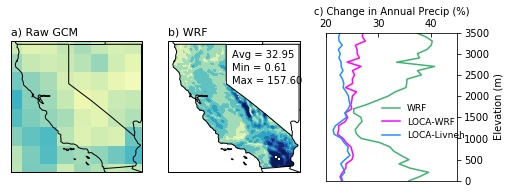

In [13]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography
inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
hgt = inv_nc.variables['HGT'][0,:,:]
inv_nc.close()

# Raw GCM (CNRM-CM5) placeholder
gcm_fut_nc = xr.open_dataset(data_dir+'cnrm_cm5_fut_2081-2100_annual_pr.nc')
gcm_hist_nc = xr.open_dataset(data_dir+'cnrm_cm5_hist_1981-2000_annual_pr.nc')
gcm_fut_pr = gcm_fut_nc.variables['PRECIP'][:,:]
gcm_hist_pr = gcm_hist_nc.variables['PRECIP'][:,:]
gcm_lon = gcm_fut_nc['LON']
gcm_lat = gcm_fut_nc['LAT']
gcm_change_pr = (((gcm_fut_pr - gcm_hist_pr) / gcm_hist_pr) * 100.)

# WRF 
wrf_fut_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_hist_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
wrf_fut_pr = wrf_fut_nc.variables['pr'][:,:]
same_lat = wrf_fut_nc.variables['lat'][:]
same_lon = wrf_fut_nc.variables['lon'][:]
wrf_hist_pr = wrf_hist_nc.variables['pr'][:,:]
wrf_change_pr = ((wrf_fut_pr - wrf_hist_pr) / wrf_hist_pr) * 100.
wrf_fut_nc.close()
wrf_hist_nc.close()

# NARR (BC) 
narr_fut_nc = netCDF4.Dataset(data_dir+'narr_forcing_livneh_fut_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_hist_nc = netCDF4.Dataset(data_dir+'livneh_narr_grid_hist_1991-2000_annual_pr_CA_mask.nc', 'r')
narr_fut_pr = narr_fut_nc.variables['pr'][:,:]
narr_lat = narr_fut_nc.variables['lat'][:]
narr_lon = narr_fut_nc.variables['lon'][:]
narr_hist_pr = narr_hist_nc.variables['pr'][:,:]
narr_change_pr = ((narr_fut_pr - narr_hist_pr) / narr_hist_pr) * 100.
narr_fut_nc.close()
narr_hist_nc.close()

# WRF-LOCA
loca_wrf_fut_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_hist_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_wrf_fut_pr = loca_wrf_fut_nc.variables['pr'][:,:]
loca_wrf_hist_pr = loca_wrf_hist_nc.variables['pr'][:,:]
loca_wrf_change_pr = ((loca_wrf_fut_pr - loca_wrf_hist_pr) / loca_wrf_hist_pr) * 100.
loca_wrf_fut_nc.close()
loca_wrf_hist_nc.close()

# LOCA-Livneh
loca_livneh_fut_nc = netCDF4.Dataset(data_dir+'loca_livneh_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_hist_nc = netCDF4.Dataset(data_dir+'loca_livneh_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
loca_livneh_fut_pr = loca_livneh_fut_nc.variables['pr'][:,:]
loca_livneh_hist_pr = loca_livneh_hist_nc.variables['pr'][:,:]
loca_livneh_change_pr = ((loca_livneh_fut_pr - loca_livneh_hist_pr) / loca_livneh_hist_pr) * 100.
loca_livneh_fut_nc.close()
loca_livneh_hist_nc.close()

# DataFrame of HGT, ca_mask, WRF, LOCA-WRF, and LOCA-Livneh
# for binning tmax changes by elevation band
df = pd.DataFrame()
df['HGT'] = hgt.flatten()
df['MASK'] = ca_mask.flatten()
df['WRF'] = wrf_change_pr.flatten()
df['LOCA-WRF'] = loca_wrf_change_pr.flatten()
df['LOCA-Livneh'] = loca_livneh_change_pr.flatten()

# Retain only CA grid cells and non-NaNs
df = df[(df['MASK'] == 1) & (df['WRF'] > 0) & (df['LOCA-WRF'] > 0) & (df['LOCA-Livneh'] > 0)]

# Compute avg pr change in 100m elevation intervals
wrf_list = []
loca_wrf_list = []
loca_livneh_list = []
for h in range(0,3600,100):
    temp_df = df[(df['HGT'] >= h) & (df['HGT'] < h + 100)].mean()
    wrf_list.append(temp_df['WRF'])
    loca_wrf_list.append(temp_df['LOCA-WRF'])
    loca_livneh_list.append(temp_df['LOCA-Livneh'])
    
# AVG, MIN, and MAX statistics
wrf_change_pr_real = wrf_change_pr[wrf_change_pr > -1000] # quick way to filter out nans
wrf_change_pr_avg, wrf_change_pr_min, wrf_change_pr_max = np.mean(wrf_change_pr_real),\
                                    np.min(wrf_change_pr_real), np.max(wrf_change_pr_real)
    
loca_wrf_change_pr_real = loca_wrf_change_pr[loca_wrf_change_pr > -100] # quick way to filter out nans
loca_wrf_change_pr_avg, loca_wrf_change_pr_min, loca_wrf_change_pr_max = np.mean(loca_wrf_change_pr_real), \
                    np.min(loca_wrf_change_pr_real), np.max(loca_wrf_change_pr_real)

loca_livneh_change_pr_real = loca_livneh_change_pr[loca_livneh_change_pr > -1000] # quick way to filter out nans
loca_livneh_change_pr_avg, loca_livneh_change_pr_min, loca_livneh_change_pr_max = np.mean(loca_livneh_change_pr_real), \
                    np.min(loca_livneh_change_pr_real), np.max(loca_livneh_change_pr_real)    

    
# Spatial correlation between WRF and LOCA-WRF for grid cells 1000-2000m
# df_1000 = df[(df['HGT'] >= 1000) & (df['HGT'] <= 2000.)]
# r_val, p_val = stats.pearsonr(df_1000['WRF'], df_1000['LOCA-WRF'])
# print('r = {0:.2f} p = {1:.2f}'.format(r_val, p_val))
    
# Figure ---
plot_ticks = np.linspace(0,80,9)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Raw GCM', loc='left', fontsize=11)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_change_pr, transform=ccrs.PlateCarree(), 
                       cmap='YlGnBu', vmin=0, vmax=80)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))


# WRF
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) WRF', loc='left', fontsize=11)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-119.5, 41, 'Avg = {0:.2f}'.format(wrf_change_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-119.5, 40, 'Min = {0:.2f}'.format(wrf_change_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax2.text(-119.5, 39, 'Max = {0:.2f}'.format(wrf_change_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot2 = ax2.contourf(same_lon, same_lat, wrf_change_pr, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='YlGnBu', extend='both')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))
    
# Precip change vs. elevation 
elev_ticks = [tick for tick in range(0,3600,100)]
ax3 = fig.add_subplot(2, 3, 3, adjustable='box')
plot3 = ax3.plot(wrf_list, elev_ticks, color='mediumseagreen', label='WRF')
plot3 = ax3.plot(loca_wrf_list, elev_ticks, color='magenta', label='LOCA-WRF')
plot3 = ax3.plot(loca_livneh_list, elev_ticks, color='dodgerblue', label='LOCA-Livneh')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.tick_params(axis='x', direction='in')
ax3.legend(loc=(.4, .25), frameon=False, fontsize=9)
ax3.set_ylabel('Elevation (m)')
ax3.set_xlabel('c) Change in Annual Precip (%)')
ax3.set_ylim(0,3500)
ax3.set_xlim(20,45)
xx0,xx1 = ax3.get_xlim()
yx0,yy1 = ax3.get_ylim()
ax3.set_aspect(abs(xx1-xx0)/abs(yy1-yy0))

# NARR (BC)
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) NARR (Bias Corrected)', loc='left', fontsize=11)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
plot4 = ax4.pcolormesh(narr_lon, narr_lat, narr_change_pr, transform=ccrs.PlateCarree(), 
                       cmap='YlGnBu', vmin=0, vmax=80)
ax4.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-WRF
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('e) LOCA-WRF', loc='left', fontsize=11)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(cfeature.BORDERS)
ax5.set_extent([235.25,246,32.25,42.25])
ax5.text(-119.5, 41, 'Avg = {0:.2f}'.format(loca_wrf_change_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-119.5, 40, 'Min = {0:.2f}'.format(loca_wrf_change_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax5.text(-119.5, 39, 'Max = {0:.2f}'.format(loca_wrf_change_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot5 = ax5.contourf(same_lon, same_lat, loca_wrf_change_pr, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='YlGnBu', extend='both')
ax5.set_aspect(abs(x1-x0)/abs(y1-y0))

# LOCA-Livneh
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('f) LOCA-Livneh', loc='left', fontsize=11)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(cfeature.BORDERS)
ax6.set_extent([235.25,246,32.25,42.25])
ax6.text(-119.5, 41, 'Avg = {0:.2f}'.format(loca_livneh_change_pr_avg),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-119.5, 40, 'Min = {0:.2f}'.format(loca_livneh_change_pr_min),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
ax6.text(-119.5, 39, 'Max = {0:.2f}'.format(loca_livneh_change_pr_max),
        horizontalalignment='left',
        transform=ccrs.Geodetic(),
        fontsize=10)
plot6 = ax6.contourf(same_lon, same_lat, loca_livneh_change_pr, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='YlGnBu', extend='both')
ax6.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout(h_pad=-3)

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0-.02, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', drawedges=True, extend='both')
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)
cbar.set_label('Change in Annual Mean Precip (%)', fontsize=12)

#plt.savefig('/Users/nberg/projects/doe/figures/Figure3.jpeg', dpi=300, bbox_inches='tight')

## Figure 4 

4-panel plot comparing LOCA-WRF and WRF historical/future projections for April Tmax and Annual PR.

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/s

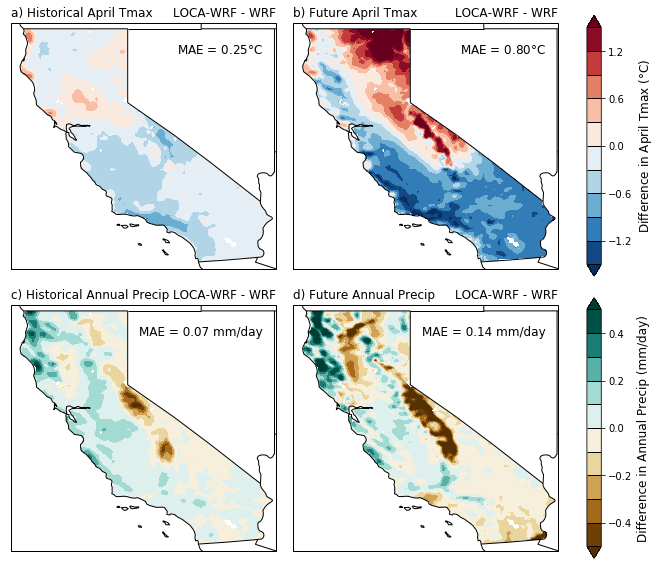

In [17]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# WRF - historical April Tmax and Annual PR
hist_wrf_tmax_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
hist_wrf_tmax = hist_wrf_tmax_nc.variables['tmax'][:,:]
same_lat = hist_wrf_tmax_nc.variables['lat'][:]
same_lon = hist_wrf_tmax_nc.variables['lon'][:]
hist_wrf_tmax_nc.close()

hist_wrf_pr_nc = netCDF4.Dataset(data_dir+'wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
hist_wrf_pr = hist_wrf_pr_nc.variables['pr'][:,:]
hist_wrf_pr_nc.close()

# LOCA-WRF historical April Tmax and Annual PR
hist_loca_wrf_tmax_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
hist_loca_wrf_tmax = hist_loca_wrf_tmax_nc.variables['tmax'][:,:]
hist_loca_wrf_tmax_nc.close()

hist_loca_wrf_pr_nc = netCDF4.Dataset(data_dir+'loca_wrf_hist_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
hist_loca_wrf_pr = hist_loca_wrf_pr_nc.variables['pr'][:,:]
hist_loca_wrf_pr_nc.close()

# WRF - future April Tmax and Annual PR
fut_wrf_tmax_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
fut_wrf_tmax = fut_wrf_tmax_nc.variables['tmax'][:,:]
fut_wrf_tmax_nc.close()

fut_wrf_pr_nc = netCDF4.Dataset(data_dir+'wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
fut_wrf_pr = fut_wrf_pr_nc.variables['pr'][:,:]
fut_wrf_pr_nc.close()

# LOCA-WRF - future April Tmax and Annual PR
fut_loca_wrf_tmax_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_tmax_april_CA_mask_same_grid.nc', 'r')
fut_loca_wrf_tmax = fut_loca_wrf_tmax_nc.variables['tmax'][:,:]
fut_loca_wrf_tmax_nc.close()

fut_loca_wrf_pr_nc = netCDF4.Dataset(data_dir+'loca_wrf_fut_1991-2000_annual_pr_CA_mask_same_grid.nc', 'r')
fut_loca_wrf_pr = fut_loca_wrf_pr_nc.variables['pr'][:,:]
fut_loca_wrf_pr_nc.close()

# Compute dataset to dataset differences
hist_diff_tmax = hist_loca_wrf_tmax - hist_wrf_tmax
hist_diff_pr = hist_loca_wrf_pr - hist_wrf_pr
fut_diff_tmax = fut_loca_wrf_tmax - fut_wrf_tmax
fut_diff_pr = fut_loca_wrf_pr - fut_wrf_pr

# Statistics (mean absolute error)
hist_diff_tmax_real = hist_diff_tmax[hist_diff_tmax > -1000] # quick way to filter out nans
hist_diff_pr_real = hist_diff_pr[hist_diff_pr > -1000]
fut_diff_tmax_real = fut_diff_tmax[hist_diff_tmax > -1000]
fut_diff_pr_real = fut_diff_pr[hist_diff_pr > -1000]

mae_hist_diff_tmax_real = np.mean(np.abs(hist_diff_tmax_real))
mae_hist_diff_pr_real = np.mean(np.abs(hist_diff_pr_real))
mae_fut_diff_tmax_real = np.mean(np.abs(fut_diff_tmax_real))
mae_fut_diff_pr_real = np.mean(np.abs(fut_diff_pr_real))
 
# 4-panel plot
tmax_ticks = np.linspace(-1.5,1.5,11)
pr_ticks = np.linspace(-.5,.5,11)

fig = plt.figure(figsize=(8,8))

# LOCA-WRF - WRF historical April Tmax
ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) Historical April Tmax', loc='left', fontsize=12)
ax1.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
ax1.text(-114.5, 41, 'MAE = {0:.2f}$\degree$C'.format(mae_hist_diff_tmax_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot1 = ax1.contourf(same_lon, same_lat, hist_diff_tmax, tmax_ticks, 
                     transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')

# LOCA-WRF - WRF future April Tmax
ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) Future April Tmax', loc='left', fontsize=12)
ax2.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
ax2.text(-114.5, 41, 'MAE = {0:.2f}$\degree$C'.format(mae_fut_diff_tmax_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot2 = ax2.contourf(same_lon, same_lat, fut_diff_tmax, tmax_ticks, 
                     transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both')

# LOCA-WRF - WRF historical Annual Pr
ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('c) Historical Annual Precip', loc='left', fontsize=12)
ax3.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(cfeature.BORDERS)
ax3.set_extent([235.25,246,32.25,42.25])
ax3.text(-114.5, 41, 'MAE = {0:.2f} mm/day'.format(mae_hist_diff_pr_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot3 = ax3.contourf(same_lon, same_lat, hist_diff_pr, pr_ticks, 
                     transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')

# LOCA-WRF - WRF future Annual PR
ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('d) Future Annual Precip', loc='left', fontsize=12)
ax4.set_title('LOCA-WRF - WRF', loc='right', fontsize=12)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(cfeature.BORDERS)
ax4.set_extent([235.25,246,32.25,42.25])
ax4.text(-114.5, 41, 'MAE = {0:.2f} mm/day'.format(mae_fut_diff_pr_real),
        horizontalalignment='right',
        transform=ccrs.Geodetic(),
        fontsize=12)
plot4 = ax4.contourf(same_lon, same_lat, fut_diff_pr, pr_ticks, 
                     transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')

fig.tight_layout()

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()

cbar_ax12 = fig.add_axes([ax2_pos.x1+0.05, ax1_pos.y0, 0.025, ax2_pos.y1 - ax2_pos.y0])
cbar12 = plt.colorbar(plot1, cax=cbar_ax12, orientation='vertical', drawedges=True, extend='both')
cbar12.dividers.set_edgecolor('black')
cbar12.dividers.set_linewidth(1)
#cbar12.set_label('Difference in April Tmax '+'('+r'$\degree$'+'C)', fontsize=12)
cbar12.set_label('Difference in April Tmax ($\degree$C)', fontsize=12)

cbar_ax34 = fig.add_axes([ax4_pos.x1+0.05, ax4_pos.y0, 0.025, ax4_pos.y1 - ax4_pos.y0])
cbar34 = plt.colorbar(plot3, cax=cbar_ax34, orientation='vertical', drawedges=True, extend='both')
cbar34.dividers.set_edgecolor('black')
cbar34.dividers.set_linewidth(1)
cbar34.set_label('Difference in Annual Precip (mm/day)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/Figure4.jpeg', dpi=300, bbox_inches='tight')

# Supplemental Figures

### Figure S1: GCM vs downscaled topography

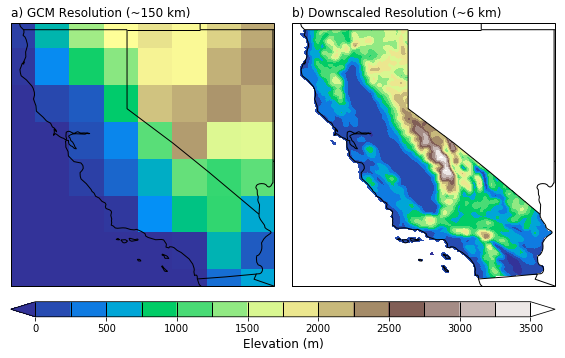

In [21]:
inv_dir = '/Users/nberg/projects/doe/data/invariant/'
data_dir = '/Users/nberg/projects/doe/data/processed/'
dest_dir = '/Users/nberg/projects/doe/figures/'

# # Same grid CA mask
mask_nc = netCDF4.Dataset(inv_dir+'same_grid_CA_mask.nc')
ca_mask = mask_nc.variables['landmask'][:,:]
mask_nc.close()

# Regridded WRF d02 topography (same resolution as LOCA-WRF and LOCA-Livneh)
wrf_inv_nc = netCDF4.Dataset(inv_dir+'invariant_d02_same_grid.nc')
wrf_hgt = wrf_inv_nc.variables['HGT'][0,:,:]
wrf_lat = wrf_inv_nc.variables['lat'][:]
wrf_lon = wrf_inv_nc.variables['lon'][:]
wrf_inv_nc.close()

# Retain only CA grid cells
wrf_hgt_ca = np.ma.masked_where(ca_mask == 0, wrf_hgt)

# Raw GCM (CNRM-CM5) topography
gcm_inv_nc = xr.open_dataset(inv_dir+'orog_fx_CNRM-CM5_historical_r0i0p0.nc')
gcm_hgt = gcm_inv_nc.variables['orog'][:,:]
gcm_lon = gcm_inv_nc['lon']
gcm_lat = gcm_inv_nc['lat']

# Figure ---
plot_ticks = np.linspace(0,3500,15)

fig = plt.figure(figsize=(8,6))

# Raw GCM
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('a) GCM Resolution (~150 km)', loc='left', fontsize=12)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(cfeature.BORDERS)
ax1.set_extent([235.25,246,32.25,42.25])
plot1 = ax1.pcolormesh(gcm_lon, gcm_lat, gcm_hgt, transform=ccrs.PlateCarree(), 
                       cmap='terrain', vmin=0, vmax=3000)
# Obtain the x and y limits to create a sqaure plot
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))

# WRF
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('b) Downscaled Resolution (~6 km)', loc='left', fontsize=12)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS)
ax2.set_extent([235.25,246,32.25,42.25])
plot2 = ax2.contourf(wrf_lon, wrf_lat, wrf_hgt_ca, plot_ticks, 
                     transform=ccrs.PlateCarree(), cmap='terrain', extend='both')
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))

fig.tight_layout()

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()

# Colorbar for all panels
cbar_height = 0.035
cbar_ax = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.1, ax2_pos.x1-ax1_pos.x0, cbar_height]) # bottom left corner x,y, and width, height
cbar = plt.colorbar(plot2, cax=cbar_ax, orientation='horizontal', drawedges=True, extend='both')
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)
cbar.set_label('Elevation (m)', fontsize=12)

plt.savefig('/Users/nberg/projects/doe/figures/FigureS1.jpeg', dpi=300, bbox_inches='tight')